In [1]:

import ipywidgets as widgets
%matplotlib widget

import numpy as np
import gudhi as gd
from gudhi import hera

from numpy.random import default_rng
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.animation as animation
import persim
import math
from celluloid import Camera
from cycler import cycler

In [2]:
st1 = gd.SimplexTree()
with open("Complex1") as f:
    content = f.readlines()    
for line in content:
    st1.insert(eval(line)[0], filtration = eval(line)[1])

st2 = gd.SimplexTree()
with open("Complex2") as f:
    content = f.readlines()    
for line in content:
    st2.insert(eval(line)[0], filtration = eval(line)[1])

In [3]:
st1 = gd.SimplexTree()
st2 = gd.SimplexTree()

st1.insert([3],filtration=0)
st2.insert([3],filtration=0)
st1.insert([1],filtration=2/4)
st2.insert([1],filtration=2/4)
st1.insert([2],filtration=1/4)
st2.insert([2],filtration=1/4)
st1.insert([0],filtration=3/4)
st2.insert([0],filtration=3/4)


st1.insert([0,3], filtration = 1.2)
st1.insert([0,1], filtration = 1)
st1.insert([0,2], filtration = 1.4)
st1.insert([1,3], filtration = 1.6)
st1.insert([1,2], filtration = 1.8)


st2.insert([1,3], filtration = 1.6)
st2.insert([1,2], filtration = 1.8)
st2.insert([0,1], filtration=2)
st2.insert([0,3], filtration=6/5)
st2.insert([0,2], filtration=7/5)
    
st1.insert([0,1,2], filtration = 3)
st2.insert([0,1,2], filtration = 3)
st1.insert([0,1,3], filtration = 3.5)
st2.insert([0,1,3], filtration = 3.5)

True

In [4]:
rng = default_rng()

st1 = gd.SimplexTree()
st2 = gd.SimplexTree()

for i in range(0,4):
    st1.insert([i],filtration=rng.random()/2)
    st2.insert([i],filtration=(rng.random()/2)+0.5)
    for j in range(0,i):
        st1.insert([i,j],filtration=(rng.random()/2)+2)
        st2.insert([i,j],filtration=(rng.random()/2)+2.5)
        for k in range(0,j):
            st1.insert([i,j,0],filtration=(rng.random()/2)+4)
            st2.insert([i,j,0],filtration=(rng.random()/2)+4.5)

st1.make_filtration_non_decreasing()
st2.make_filtration_non_decreasing()

False

In [5]:
st1 = gd.SimplexTree()
st2 = gd.SimplexTree()

for i in range(0,4):
    st1.insert([i],filtration=rng.random()/2)
    st2.insert([i],filtration=(rng.random()/2)+0.5)
    for j in range(0,i):
        st1.insert([i,j],filtration=(rng.random()/2)+2)
        st2.insert([i,j],filtration=(rng.random()/2)+2.5)

st1.insert([0,1,2],filtration=4.0)
st1.insert([0,1,3],filtration=4.1)
st1.insert([0,2,3],filtration=4.25)
st1.insert([1,2,3],filtration=4.4)

st2.insert([0,1,2],filtration=4.9)
st2.insert([0,1,3],filtration=4.7)
st2.insert([0,2,3],filtration=4.55)
st2.insert([1,2,3],filtration=4.45)

#st1.make_filtration_non_decreasing()
#st2.make_filtration_non_decreasing()

True

In [12]:
#extending the above example to n instead of 2
st1 = gd.SimplexTree()
st2 = gd.SimplexTree()
n = 4

for i in range(0,n+2):
    st1.insert([i],filtration = ((n+1-i)%(n+2))/(n+2))
    st2.insert([i],filtration = ((n+1-i)%(n+2))/(n+2))
    
st1.insert([0,1],filtration = 1)
st2.insert([0,1],filtration = 2)

for i in range(2,n+2):
    st1.insert([0,i],filtration = (4*n-2*i+4)/(2*n+1))
    st2.insert([0,i],filtration = (4*n-2*i+4)/(2*n+1))
    st1.insert([1,i],filtration = (4*n-2*i+5)/(2*n+1))
    st2.insert([1,i],filtration = (4*n-2*i+5)/(2*n+1))
    
for i in range(2,n+2):
    st1.insert([0,1,i],filtration = 3+(i-2)/n)
    st2.insert([0,1,i],filtration = 3+(i-2)/n)

In [7]:
st1 = gd.SimplexTree()
st2 = gd.SimplexTree()
n = 4

st1.insert([0],filtration = 0)
st2.insert([0],filtration = 1)

for i in range(1,n+1):
    st1.insert([i],filtration = i/(n+1))
    st2.insert([i],filtration = i/(n+1))

for i in range(1,n+1):
    st1.insert([0,i],filtration = 1+i/(n+1))
    st2.insert([0,i],filtration = 1+i/(n+1))

In [13]:
st1_gen  = st1.get_filtration() 
sc1_dict = {}
for splx in st1_gen :
    sc1_dict.update({str(splx[0]):splx[1]})
    print(splx)

([5], 0.0)
([4], 0.16666666666666666)
([3], 0.3333333333333333)
([2], 0.5)
([1], 0.6666666666666666)
([0], 0.8333333333333334)
([0, 1], 1.0)
([0, 5], 1.1111111111111112)
([1, 5], 1.2222222222222223)
([0, 4], 1.3333333333333333)
([1, 4], 1.4444444444444444)
([0, 3], 1.5555555555555556)
([1, 3], 1.6666666666666667)
([0, 2], 1.7777777777777777)
([1, 2], 1.8888888888888888)
([0, 1, 2], 3.0)
([0, 1, 3], 3.25)
([0, 1, 4], 3.5)
([0, 1, 5], 3.75)


In [14]:
st2_gen= st2.get_filtration() 
sc2_dict = {}
for splx in st2_gen :
    sc2_dict.update({str(splx[0]):splx[1]})
    print(splx)

([5], 0.0)
([4], 0.16666666666666666)
([3], 0.3333333333333333)
([2], 0.5)
([1], 0.6666666666666666)
([0], 0.8333333333333334)
([0, 5], 1.1111111111111112)
([1, 5], 1.2222222222222223)
([0, 4], 1.3333333333333333)
([1, 4], 1.4444444444444444)
([0, 3], 1.5555555555555556)
([1, 3], 1.6666666666666667)
([0, 2], 1.7777777777777777)
([1, 2], 1.8888888888888888)
([0, 1], 2.0)
([0, 1, 2], 3.0)
([0, 1, 3], 3.25)
([0, 1, 4], 3.5)
([0, 1, 5], 3.75)


In [21]:
dists_simplices = {k:np.abs(sc1_dict[k]- sc2_dict[k]) for k in sc1_dict.keys() if len(k)>3}
dists = np.unique(list(dists_simplices.values()))
dists = np.sort(dists)

far_simplices = [(sum(x >= d for x in dists_simplices.values())) for d in dists]
print(dists_simplices)

{'[0, 1]': 1.0, '[0, 9]': 0.0, '[1, 9]': 0.0, '[0, 8]': 0.0, '[1, 8]': 0.0, '[0, 7]': 0.0, '[1, 7]': 0.0, '[0, 6]': 0.0, '[1, 6]': 0.0, '[0, 5]': 0.0, '[1, 5]': 0.0, '[0, 4]': 0.0, '[1, 4]': 0.0, '[0, 3]': 0.0, '[1, 3]': 0.0, '[0, 2]': 0.0, '[1, 2]': 0.0, '[0, 1, 2]': 0.0, '[0, 1, 3]': 0.0, '[0, 1, 4]': 0.0, '[0, 1, 5]': 0.0, '[0, 1, 6]': 0.0, '[0, 1, 7]': 0.0, '[0, 1, 8]': 0.0, '[0, 1, 9]': 0.0}


In [22]:
st1.compute_persistence()
st2.compute_persistence()

st1P0 = st1.persistence_intervals_in_dimension(0)
st2P0 = st2.persistence_intervals_in_dimension(0)

st1P1 = st1.persistence_intervals_in_dimension(1)
st2P1 = st2.persistence_intervals_in_dimension(1)

PP1= {}
for p in st1.persistence_pairs():
    PP1.update({str(p):{"dim":len(p[0])-1, "birth":st1.filtration(p[0]),"death":st1.filtration(p[1])}})

PP2= {}
for p in st2.persistence_pairs():
    PP2.update({str(p):{"dim":len(p[0])-1, "birth":st2.filtration(p[0]),"death":st2.filtration(p[1])}})
    
print(PP1)
print(PP2)

{'([0], [1, 0])': {'dim': 0, 'birth': 0.9, 'death': 1.0}, '([1], [9, 0])': {'dim': 0, 'birth': 0.8, 'death': 1.0588235294117647}, '([8], [8, 0])': {'dim': 0, 'birth': 0.1, 'death': 1.1764705882352942}, '([7], [7, 0])': {'dim': 0, 'birth': 0.2, 'death': 1.2941176470588236}, '([6], [6, 0])': {'dim': 0, 'birth': 0.3, 'death': 1.411764705882353}, '([5], [5, 0])': {'dim': 0, 'birth': 0.4, 'death': 1.5294117647058822}, '([4], [4, 0])': {'dim': 0, 'birth': 0.5, 'death': 1.6470588235294117}, '([3], [3, 0])': {'dim': 0, 'birth': 0.6, 'death': 1.7647058823529411}, '([2], [2, 0])': {'dim': 0, 'birth': 0.7, 'death': 1.8823529411764706}, '([2, 1], [2, 1, 0])': {'dim': 1, 'birth': 1.9411764705882353, 'death': 3.0}, '([3, 1], [3, 1, 0])': {'dim': 1, 'birth': 1.8235294117647058, 'death': 3.125}, '([4, 1], [4, 1, 0])': {'dim': 1, 'birth': 1.7058823529411764, 'death': 3.25}, '([5, 1], [5, 1, 0])': {'dim': 1, 'birth': 1.588235294117647, 'death': 3.375}, '([6, 1], [6, 1, 0])': {'dim': 1, 'birth': 1.470588

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
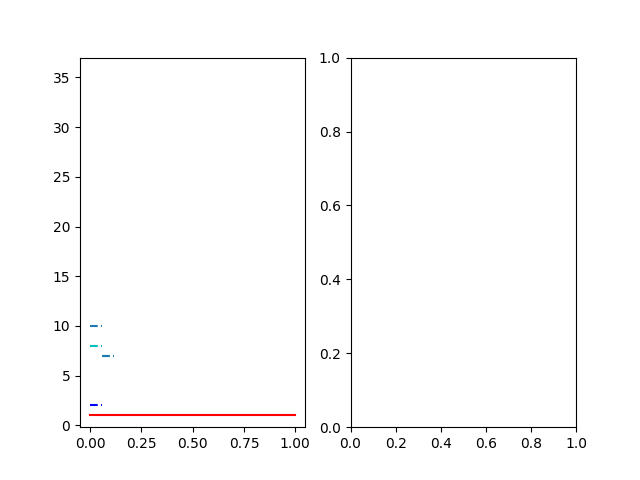

[0.05882352941176472, 0.05882352941176472, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.11764705882352944, 0.11764705882352944, 0.11764705882352944, 0.11764705882352944, 0.11764705882352944, 0.11764705882352944, 0.11764705882352922, 0.05882352941176472, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [23]:
n_points0 = len(st1P0)+len(st2P0)
d_vals0 = np.linspace(0,n_points0,n_points0+1)
r_vals0 = [gd.prokhorov_distance(st1P0, st2P0, np.array([r])) for r in d_vals0]
n_points1 = len(st1P1)+len(st2P1)
d_vals1 = np.linspace(0,n_points1,n_points1+1)
r_vals1 = [gd.prokhorov_distance(st1P1, st2P1, np.array([r])) for r in d_vals1]
n_points=n_points0+n_points1
r_vals=np.sort(np.append(r_vals0,r_vals1))[::-1]

f,(ax,ax2) = plt.subplots(1,2)

ax.plot((0,dists[0]),(far_simplices[0],far_simplices[0]), c='r')
for i in range(0,len(dists)-1):
    ax.plot((dists[i],dists[i+1]),(far_simplices[i+1],far_simplices[i+1]), c='r')
    
for i in range(1,n_points1+1):
    ax.plot((r_vals1[i],r_vals1[i-1]),(i, i), c='c', label='$D_{X,Y}$', ls="--")
ax.plot((r_vals1[-1],0),(n_points1, n_points1), c='c', label='$D_{X,Y}$', ls="--")
for i in range(1,n_points0+1):
    ax.plot((r_vals0[i],r_vals0[i-1]),(i, i), c='b', label='$D_{X,Y}$', ls="--")
ax.plot((r_vals0[-1],0),(n_points0, n_points0), c='b', label='$D_{X,Y}$', ls="--")
for i in range(1,n_points+1):
    ax.plot((r_vals[i],r_vals[i-1]),(i, i), color='tab:blue', label='$D_{X,Y}$', ls="--")
ax.plot((r_vals[-1],0),(n_points, n_points), color='tab:blue', label='$D_{X,Y}$', ls="--")

#bp = np.array([gd.bottleneck_profile(st1P0, st2P0,r0) for r0 in np.sort(r_vals0)])
#ax.plot(np.sort(r_vals0),bp)


#diag_dists=np.sort(np.append((st1P[:,1]-st1P[:,0])/2,(st2P[:,1]-st2P[:,0])/2))
#for i in range(1,len(diag_dists)):
#    ax.plot((diag_dists[i-1],diag_dists[i]),(len(diag_dists)-i, len(diag_dists)-i), color='tab:orange', label='$D_{X,Y}$', ls="--")
#ax.plot((0,diag_dists[0]),(len(diag_dists), len(diag_dists)), color='tab:orange', label='$D_{X,Y}$', ls="--")    
X = np.concatenate((st1P0,st1P1), axis=0)
Y = np.concatenate((st2P0,st2P1), axis=0)

rs=np.linspace(0.1,1,1001)
#Bottleneck_counts=[gd.bottleneck_profile(st1P1,st2P1,r)+gd.bottleneck_profile(st1P0,st2P0,r) for r in rs]
#for p in range(1,6):
#    ax.plot(rs,np.floor(gd.hera.wasserstein_distance(X, Y, order=p, internal_p=np.inf)/(rs**p)), label = "$W_1(X,Y)/\varepsilon$")
#for r in rs:
#    ax.scatter(r,gd.bottleneck_profile(st1P,st2P,r))
ax.set_ylim((-0.2,n_points+1))
plt.show()
print(r_vals0)
print(r_vals1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
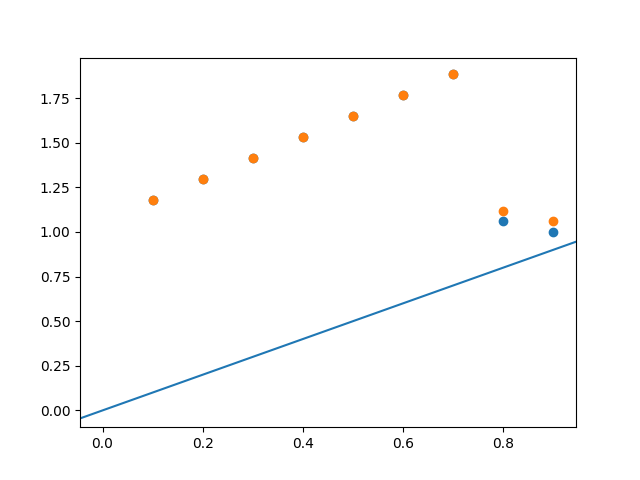

In [24]:
f, ax = plt.subplots()
ax.scatter(st1P0[:,0], st1P0[:,1])
ax.scatter(st2P0[:,0], st2P0[:,1])
#ax.set_xlim((0,2))
#ax.set_ylim((0,2))
ax.axline((0,0), slope=1)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
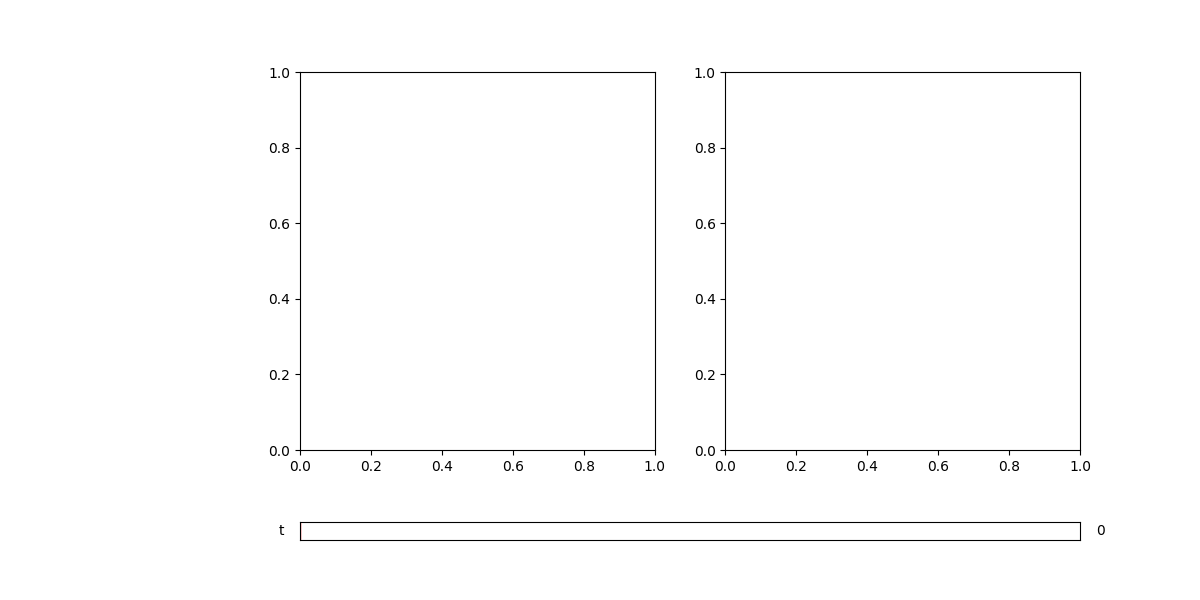

In [25]:
f,(ax, ax2) = plt.subplots(1,2,figsize=(12,6))
plt.subplots_adjust(left=0.25, bottom=0.25)
axeps = plt.axes([0.25, 0.1, 0.65, 0.03])
seps2 = Slider(axeps, 't', 0.0, 1, valinit=0, valstep=0.01)

def update(val):
    ax.clear()
    ax2.clear()
    ax2.set_prop_cycle(cycler('color', plt.cm.jet(np.linspace(0, 1, n+2+2*n+1+n))))
    st1_gen  = st1.get_filtration() 
    stt = gd.SimplexTree()
    for splx in st1_gen :
        stt.insert(splx[0],filtration = val*st2.filtration(splx[0])+(1-val)*splx[1])
        ax2.plot((0,1),(splx[1],st2.filtration(splx[0])), label = splx[0])
    stt.compute_persistence()
    PPt= {}
    for p in stt.persistence_pairs():
        PPt.update({str(p):{"dim":len(p[0])-1, "birth":stt.filtration(p[0]),"death":stt.filtration(p[1])}})
    
    sttP0 = stt.persistence_intervals_in_dimension(0)
    sttP1 = stt.persistence_intervals_in_dimension(1)
    ax.scatter(st1P0[:,0],st1P0[:,1],label='$Dgm(f_0)$',color="tab:blue")
    ax.scatter(st2P0[:,0],st2P0[:,1],label='$Dgm(f_1)$',color="tab:orange")
    ax.scatter(sttP0[:,0],sttP0[:,1],label='$Dgm(f_t)$',color="tab:green")
    ax.scatter(st1P1[:,0],st1P1[:,1],label='$Dgm(f_0)$',color="tab:blue", marker="^")
    ax.scatter(st2P1[:,0],st2P1[:,1],label='$Dgm(f_1)$',color="tab:orange", marker="^")
    ax.scatter(sttP1[:,0],sttP1[:,1],label='$Dgm(f_t)$',color="tab:green", marker="^")
    ax.axline((0,0), slope=1,ls="--",color="black")
    (bottom,top) = ax.get_ylim()
    PPdicts=[PP1,PPt,PP2]
    
    for PP in PPdicts:
        for (k,v) in PP.items():
            if(not math.isinf(v["death"])):
                ax.annotate(k, (v["birth"],v["death"]),fontsize=5)
            else:
                ax.annotate(k, (v["birth"],0.95*top),fontsize=5)

    ax2.vlines(val, 0,4,ls="--", color="black")
    
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="lower right")
    ax2.legend(bbox_to_anchor=(1,1), loc="upper left")    
    f.canvas.draw_idle()
    
seps2.on_changed(update)

plt.show()

In [26]:
print(gd.bottleneck_distance(st1P1,st2P1))
print(gd.hera.wasserstein_distance(st1P1,st2P1, order=1, internal_p=1))


0.11764705882352944
0.8823529411764706


In [17]:
st1_gen  = st1.get_filtration() 
st2_gen  = st2.get_filtration() 
Intersection_times = {}
for sigma in st1_gen :
    st2_gen  = st2.get_filtration() 
    for tau in st2_gen :
        if(st2.filtration(sigma[0])-st1.filtration(sigma[0])-st2.filtration(tau[0])+st1.filtration(tau[0])!=0):
            time = (st1.filtration(tau[0])-st1.filtration(sigma[0]))/(st2.filtration(sigma[0])-st1.filtration(sigma[0])-st2.filtration(tau[0])+st1.filtration(tau[0]))
            #print((sigma[0],tau[0]),time)
            if(len(sigma[0])==len(tau[0])) and time>0 and time<1 and sigma[0]!=tau[0] and str((tau[0],sigma[0])) not in Intersection_times.keys():
                Intersection_times.update({str((sigma[0],tau[0])): time})

Intersection_times = dict(sorted(Intersection_times.items(), key=lambda item: item[1]))
                
print(Intersection_times)

{'([0], [1])': 0.2, '([0], [2])': 0.4, '([0], [3])': 0.6, '([0], [4])': 0.8}


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
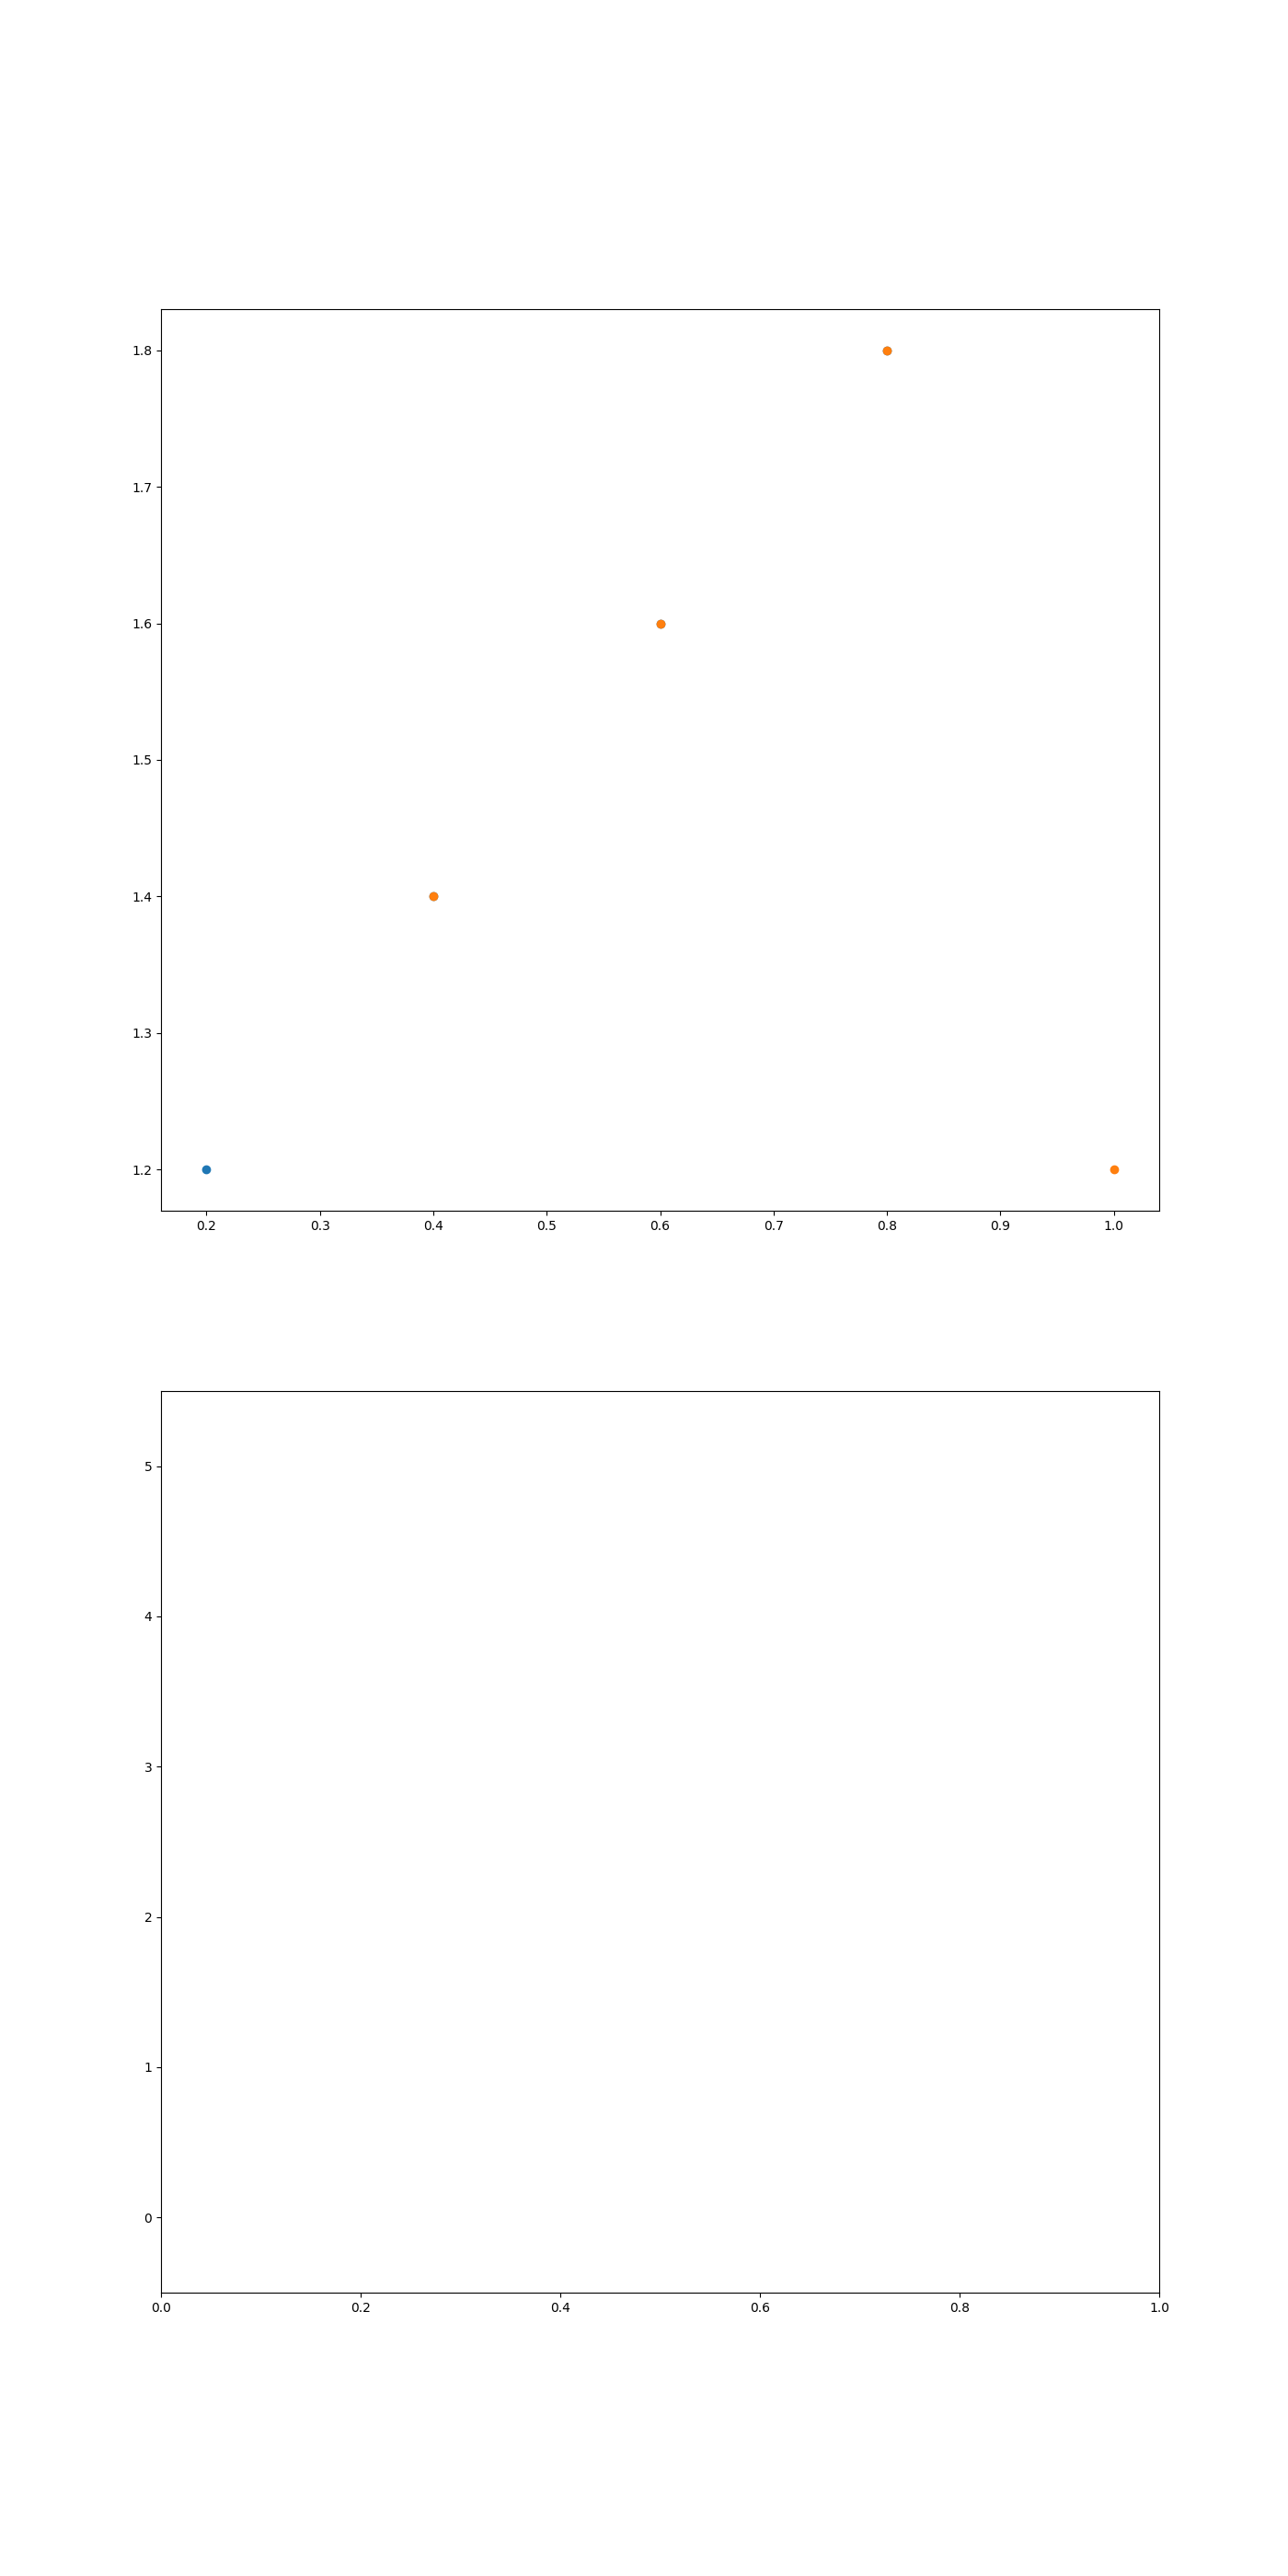

In [18]:
f,(ax, ax2) = plt.subplots(2,1,figsize=(14,28))
ax2.set_ylim((-0.5,5.5))

viridis = cm.get_cmap('hsv')#, len(Intersection_times)+1)
colormap = plt.cm.gist_ncar
ax2.set_prop_cycle(cycler('color', plt.cm.jet(np.linspace(0, 1, 13))))


eps=0.0001

ax.scatter(st1P0[:,0],st1P0[:,1],label='$Dgm(f_0)$',color="tab:blue")
ax.scatter(st2P0[:,0],st2P0[:,1],label='$Dgm(f_1)$',color="tab:orange")
#ax.scatter(sttP0[:,0],sttP0[:,1],label='$Dgm(f_t)$',color="tab:green")
ax.scatter(st1P1[:,0],st1P1[:,1],label='$Dgm(f_0)$',color="tab:blue", marker="^")
ax.scatter(st2P1[:,0],st2P1[:,1],label='$Dgm(f_1)$',color="tab:orange", marker="^")
#ax.scatter(sttP1[:,0],sttP1[:,1],label='$Dgm(f_t)$',color="tab:green", marker="^")
ax.axline((0,0), slope=1,ls="--",color="black")
    
    
(bottom,top) = ax.get_ylim()
PPdicts=[PP1,PP2]
    
#annotate points in PDs with persistence pairs
for PP in PPdicts:
    for (k,v) in PP.items():
        if(not math.isinf(v["death"])):
            ax.annotate(k, (v["birth"],v["death"]),fontsize=5)
        else:
            ax.annotate(k, (v["birth"],0.95*top),fontsize=5)

st1_gen  = st1.get_filtration() 
for splx in st1_gen :
    ax2.plot((0,1),(splx[1],st2.filtration(splx[0])), label = splx[0])
            
oldPP = PP1
for (key,val) in Intersection_times.items():
    #ax.clear()
    #ax2.clear()

    stt = gd.SimplexTree()
    st1_gen  = st1.get_filtration() 
    for splx in st1_gen :
        stt.insert(splx[0],filtration = (val-eps)*st2.filtration(splx[0])+(1-(val-eps))*splx[1])
    stt.compute_persistence()
    PPt= {}
    for p in stt.persistence_pairs():
        PPt.update({str(p):{"dim":len(p[0])-1, "birth":stt.filtration(p[0]),"death":stt.filtration(p[1])}})
    sttP0 = stt.persistence_intervals_in_dimension(0)
    sttP1 = stt.persistence_intervals_in_dimension(1)
    
    for (k,v) in oldPP.items():
        ax.plot((v["birth"],PPt[k]["birth"]),(v["death"],PPt[k]["death"]), color="gray")
    
    
    stt = gd.SimplexTree()
    st1_gen  = st1.get_filtration() 
    for splx in st1_gen :
        stt.insert(splx[0],filtration = (val+eps)*st2.filtration(splx[0])+(1-(val+eps))*splx[1])
    stt.compute_persistence()
    PPt= {}
    for p in stt.persistence_pairs():
        PPt.update({str(p):{"dim":len(p[0])-1, "birth":stt.filtration(p[0]),"death":stt.filtration(p[1])}})
    sttP0 = stt.persistence_intervals_in_dimension(0)
    sttP1 = stt.persistence_intervals_in_dimension(1)
    
    for (k,v) in PPt.items():
        #if eval(key)[0] in eval(k) or eval(key)[1] in eval(k):
        col = viridis(val)
        ax.scatter(v["birth"],v["death"],label='$Dgm(f_t)$', color=col, cmap= "viridis")
        ax.annotate(k, (v["birth"],v["death"]), fontsize=5)

    
    oldPP = PPt
    #Vlines at intersections
    ax2.vlines(val, 0,5,ls="--", color="black")
    ax2.annotate(key, (val,-0.5),fontsize=10, rotation="90")
    ax2.annotate(key, (val,5),fontsize=10, rotation="90")
    
    #legends
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="lower right")
    handles, labels = ax2.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax2.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1,1), loc="upper left")    
    #plt.pause(0.1)
    #camera.snap()

for (k,v) in oldPP.items():
    ax.plot((v["birth"],PP2[k]["birth"]),(v["death"],PP2[k]["death"]), color="gray")

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
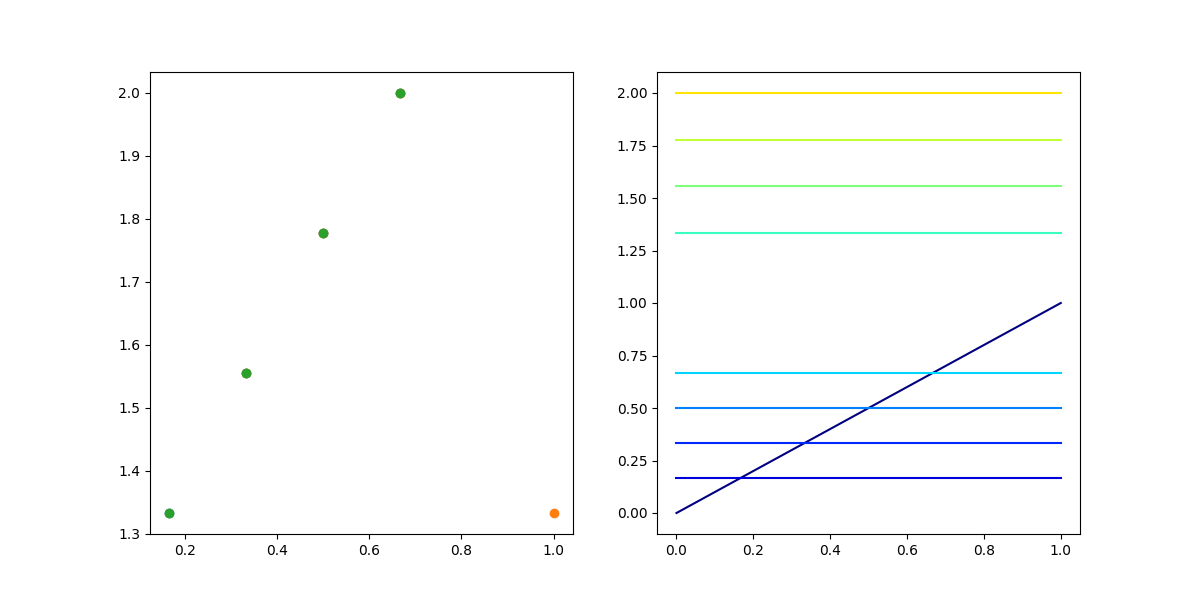

In [29]:
ts=np.linspace(0,1,51)

f,(ax, ax2) = plt.subplots(1,2,figsize=(12,6))
camera = Camera(f)
colormap = plt.cm.gist_ncar


for val in ts:
    #ax.clear()
    #ax2.clear()
    ax2.set_prop_cycle(cycler('color', plt.cm.jet(np.linspace(0, 1, 13))))
    stt = gd.SimplexTree()
    st1_gen  = st1.get_filtration() 
    for splx in st1_gen :
        stt.insert(splx[0],filtration = val*st2.filtration(splx[0])+(1-val)*splx[1])
        ax2.plot((0,1),(splx[1],st2.filtration(splx[0])), label = splx[0])
    stt.compute_persistence()
    PPt= {}
    for p in stt.persistence_pairs():
        PPt.update({str(p):{"dim":len(p[0])-1, "birth":stt.filtration(p[0]),"death":stt.filtration(p[1])}})
    
    sttP0 = stt.persistence_intervals_in_dimension(0)
    sttP1 = stt.persistence_intervals_in_dimension(1)
    ax.scatter(st1P0[:,0],st1P0[:,1],label='$Dgm(f_0)$',color="tab:blue")
    ax.scatter(st2P0[:,0],st2P0[:,1],label='$Dgm(f_1)$',color="tab:orange")
    ax.scatter(sttP0[:,0],sttP0[:,1],label='$Dgm(f_t)$',color="tab:green")
    ax.scatter(st1P1[:,0],st1P1[:,1],label='$Dgm(f_0)$',color="tab:blue", marker="^")
    ax.scatter(st2P1[:,0],st2P1[:,1],label='$Dgm(f_1)$',color="tab:orange", marker="^")
    ax.scatter(sttP1[:,0],sttP1[:,1],label='$Dgm(f_t)$',color="tab:green", marker="^")
    ax.axline((0,0), slope=1,ls="--",color="black")
    
    
    (bottom,top) = ax.get_ylim()
    PPdicts=[PP1,PPt,PP2]
    
    for PP in PPdicts:
        for (k,v) in PP.items():
            if(not math.isinf(v["death"])):
                ax.annotate(k, (v["birth"],v["death"]),fontsize=5)
            else:
                ax.annotate(k, (v["birth"],0.95*top),fontsize=5)

    ax2.vlines(val, 0,3,ls="--", color="black")
    
    #legends
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="lower right")
    handles, labels = ax2.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax2.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1,1), loc="upper left")    
    plt.pause(0.1)
    camera.snap()
    #f.canvas.draw_idle()




In [30]:
animation = camera.animate()
animation.save('animation.mp4', fps=10)

In [66]:
f,ax = plt.subplots()
persim.plot_diagrams([st1.persistence_intervals_in_dimension(0),st1.persistence_intervals_in_dimension(1),st2.persistence_intervals_in_dimension(0),st2.persistence_intervals_in_dimension(1)], ax=ax)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …